In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
anos = [2019, 2021, 2022]

dados_df = pd.DataFrame()

for ano in anos:
    df = pd.read_csv(f'situacaofinalalunos{ano}.csv', sep=';')
    da = df.loc[(df['anoensino'] == '9º ANO'), ['ano', 'nescolnome', 'ebairrnome', 'cescolrpae', 'anoensino', 'nturesnome', 'mat', 'alunosexo', 'situ', 'esitaldesc']]
    
    dados_df = pd.concat([dados_df, da], ignore_index=True)

dados_df.to_csv('tabela9ano.csv', sep=';', index=False, header=True)

Iniciei um df vazio, depois, criei um df vazio chamado dados_df que será usado para armazenar todos os dados selecionados.
Fiz igual o código antigo, um Loop pelos anos, usando o for, assim preenchemos sobre cada ano na lista de anos especificada.
Em seguida li o CSV e selecionei os dados, então para cada ano, leu o arquivo CSV correspondente e seleciou os dados específicos na condição 'anoensino' == '9º ANO'.
Adicionei dados ao DataFrame dados_df, utilizei o pd.concat (que concactena os dados) para adicionar os dados selecionados ao df dados_df. O  ignore_index=True é utilizado para ignorar os índices originais dos df e criar um novo índice sequencial para evitar duplicação.
Então salvei o DataFrame completo, contendo todos os dados e cabeçalho no arquivo csv. O header=True garante que o arquivo contenha os cabeçalhos e o index=False evita a inclusão do índice no arquivo.

In [3]:
df9ano = pd.read_csv('tabela9ano.csv', sep = ';')
df9ano

,ano,nescolnome,ebairrnome,cescolrpae,anoensino,nturesnome,mat,alunosexo,situ,esitaldesc
0,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,15755274,M,TA,TR DUR ANO P/REDE
1,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,14286068,F,RN,RENV S/SIT FINAL DEF
2,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,5035864,M,RN,RENV S/SIT FINAL DEF
3,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,12059293,M,RN,RENV S/SIT FINAL DEF
4,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,13165470,M,RN,RENV S/SIT FINAL DEF
...,...,...,...,...,...,...,...,...,...,...
8362,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14306131,F,AP,APROVADO
8363,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14328186,M,AP,APROVADO
8364,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15034879,F,AP,APROVADO
8365,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15073009,F,AP,APROVADO


In [4]:
# Renomeando as colunas

df9ano.rename(columns={'ano':'ANO', 'nescolnome':'ESCOLA', 'ebairrnome':'BAIRRO',
        'cescolrpae':'RPA', 'anoensino':'SÉRIE', 'nturesnome':'TURNO',
        'mat':'MATRÍCULA', 'alunosexo':'SEXO','situ':'SITUAÇÃO', 'esitaldesc':'RESULTADO'}, inplace = True)
df9ano

,ANO,ESCOLA,BAIRRO,RPA,SÉRIE,TURNO,MATRÍCULA,SEXO,SITUAÇÃO,RESULTADO
0,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,15755274,M,TA,TR DUR ANO P/REDE
1,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,14286068,F,RN,RENV S/SIT FINAL DEF
2,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,5035864,M,RN,RENV S/SIT FINAL DEF
3,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,12059293,M,RN,RENV S/SIT FINAL DEF
4,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,13165470,M,RN,RENV S/SIT FINAL DEF
...,...,...,...,...,...,...,...,...,...,...
8362,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14306131,F,AP,APROVADO
8363,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14328186,M,AP,APROVADO
8364,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15034879,F,AP,APROVADO
8365,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15073009,F,AP,APROVADO


In [5]:
df9ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ANO        8367 non-null   int64 
 1   ESCOLA     8367 non-null   object
 2   BAIRRO     8367 non-null   object
 3   RPA        8367 non-null   int64 
 4   SÉRIE      8367 non-null   object
 5   TURNO      8367 non-null   object
 6   MATRÍCULA  8367 non-null   int64 
 7   SEXO       8367 non-null   object
 8   SITUAÇÃO   8367 non-null   object
 9   RESULTADO  8367 non-null   object
dtypes: int64(3), object(7)
memory usage: 653.8+ KB


In [6]:
df9ano['ANO'].value_counts()

ANO
2022    3128
2021    2819
2019    2420
Name: count, dtype: int64

In [7]:
df9ano['ANO'].unique()

array([2019, 2021, 2022], dtype=int64)

<Axes: xlabel='ANO'>

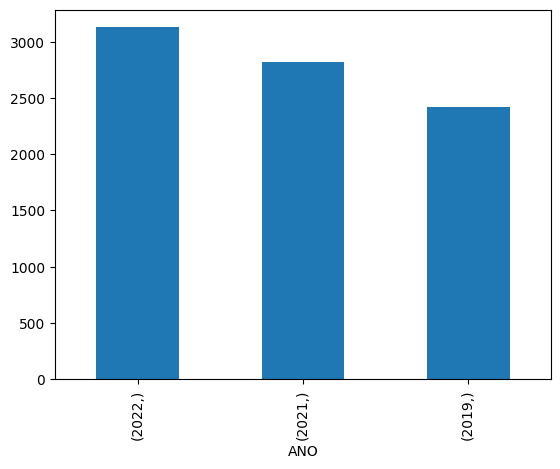

In [8]:
df9ano[['ANO']].value_counts(normalize=False).plot(kind='bar')

A primeira análise tem que ser do ano, pra mostrar que ouve um crescimento no número dos alunos. Só falta colocar o ano em crescente.